<a href="https://colab.research.google.com/github/nopimhra/Mobile-Price-Classification/blob/main/221130964_Novia_Cahaya_Mahara_Tugas1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import kagglehub
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
path = kagglehub.dataset_download("iabhishekofficial/mobile-price-classification")

print("Path to dataset files:", path)

df_train = pd.read_csv(path + "/train.csv")
df_train.head()

Using Colab cache for faster access to the 'mobile-price-classification' dataset.
Path to dataset files: /kaggle/input/mobile-price-classification


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df_test = pd.read_csv(path + "/test.csv")
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [ ]:
df_train.isna().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [ ]:
df_train.duplicated().sum()

np.int64(0)

In [ ]:
df_test.isna().sum()

,0
id,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0


In [ ]:
df_test.duplicated().sum()

np.int64(0)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df_train['price_range'].describe(), df_train['price_range'].unique()

(count    2000.000000
 mean        1.500000
 std         1.118314
 min         0.000000
 25%         0.750000
 50%         1.500000
 75%         2.250000
 max         3.000000
 Name: price_range, dtype: float64,
 array([1, 2, 3, 0]))

In [ ]:
y_t = np.array(df_train ['price_range'])
X_t = df_train.drop(['price_range'],axis=1)
X_t = np.array(X_t)

print("shape of Y :"+str(y_t.shape))
print("shape of X :"+str(X_t.shape))

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_t = scaler.fit_transform(X_t)

shape of Y :(2000,)
shape of X :(2000, 20)


In [ ]:
df_train= pd.DataFrame(X_t)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0


In [ ]:
df_test = df_test.drop(["id"],axis=1)
df_test = scaler.fit_transform(df_test)
df_test= pd.DataFrame(df_test)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.362241,1.0,0.52,1.0,0.736842,0.0,0.048387,0.000000,0.941667,0.285714,0.8,0.118511,0.608550,0.862319,0.500000,0.388889,0.000000,0.0,1.0,0.0
1,0.227485,1.0,0.00,1.0,0.210526,1.0,0.951613,0.777778,0.925000,0.571429,0.6,0.391190,0.237809,0.974772,0.071429,0.000000,0.277778,1.0,0.0,0.0
2,0.871915,1.0,0.92,0.0,0.052632,0.0,0.403226,0.888889,0.883333,0.285714,0.2,0.665967,0.577822,0.572464,0.857143,0.555556,0.444444,0.0,1.0,1.0
3,0.697799,0.0,0.00,1.0,0.947368,1.0,0.370968,0.444444,0.133333,1.000000,1.0,0.154693,0.835671,0.974235,0.357143,0.000000,0.277778,1.0,1.0,0.0
4,0.623082,0.0,0.36,0.0,0.578947,1.0,0.758065,0.444444,0.233333,0.714286,0.9,0.392764,0.206413,0.405260,0.714286,0.444444,0.277778,1.0,0.0,1.0


# **Split Data**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_t,y_t,test_size=.20,random_state=42)
print("shape of X Train :"+str(X_train.shape))
print("shape of X Test :"+str(X_test.shape))
print("shape of Y Train :"+str(Y_train.shape))
print("shape of Y Test :"+str(Y_test.shape))

shape of X Train :(1600, 20)
shape of X Test :(400, 20)
shape of Y Train :(1600,)
shape of Y Test :(400,)


# **Modeling dan Tunning dengan rbf**

In [ ]:
svm_model_rbf = SVC(kernel="rbf", class_weight="balanced")

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameter_grid = {'C':[1,5,7,10,15,25,50],
                  'gamma':[.1,.5,.10,.25,.50,1]
                  }

grid_search =GridSearchCV(
        estimator=svm_model_rbf,
        param_grid=parameter_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
)

grid_search.fit(X_train,Y_train)

print("Best Params:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

print(grid_search.best_estimator_)

Best Params: {'C': 5, 'gamma': 0.1}
Best Cross-Validation Accuracy: 0.905625
SVC(C=5, class_weight='balanced', gamma=0.1)


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


akurasi di data test menggunakan kernel rbf : 0.9075
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       105
           1       0.85      0.91      0.88        91
           2       0.88      0.85      0.86        92
           3       0.95      0.93      0.94       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.90       400
weighted avg       0.91      0.91      0.91       400



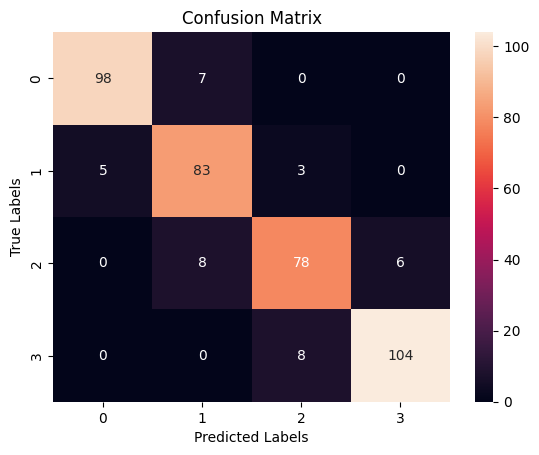

In [ ]:
print("\nakurasi di data test menggunakan kernel rbf :", accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# **Modeling dan tunning dengan linear**

In [ ]:
svm_model_linear = SVC(kernel="linear", class_weight="balanced")

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameter_grid = {'C':[1,5,7,10,15,25,50],
                  }

grid_search =GridSearchCV(
        estimator=svm_model_linear,
        param_grid=parameter_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
)

grid_search.fit(X_train,Y_train)

print("Best Params:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

print(grid_search.best_estimator_)

Best Params: {'C': 15}
Best Cross-Validation Accuracy: 0.959375
SVC(C=15, class_weight='balanced', kernel='linear')


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


akurasi di data test menggunakan kernel linear : 0.9675
              precision    recall  f1-score   support

           0       1.00      0.93      0.97       105
           1       0.90      1.00      0.95        91
           2       1.00      0.93      0.97        92
           3       0.97      1.00      0.99       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



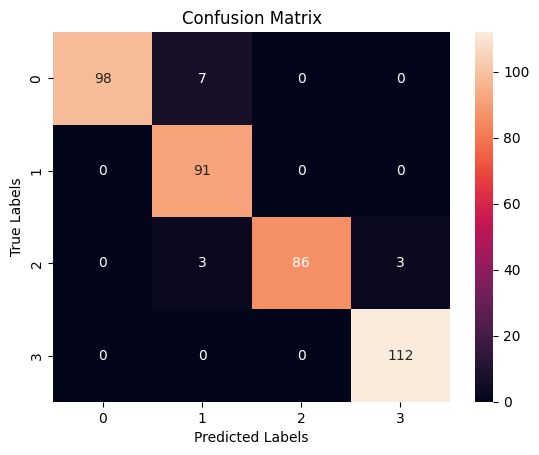

In [ ]:
print("\nakurasi di data test menggunakan kernel linear :", accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()